# Handling sidewall core data

In [1]:
from striplog import Striplog
% matplotlib inline

Some things really are point data. Sort of like a log, but irregular, more discrete. For instance we may have some porosity measurements of sidewall core plugs.

In [11]:
data_csv = """top, density, porosity, remarks
1200, 2300, 6.4,
1205, 2375, 7.3,
1210, 2400, 8.2, broken sample
1250, 2425, 9.2,
1275, 2575, 4.3,
1300, 2600, 2.2,
"""

You must specify `points=True` otherwise Striplog will 'fill in' and create the bases for you, based on the next top.

In [12]:
swc_porosity = Striplog.from_csv_text(data_csv, points=True)

In [13]:
swc_porosity

Striplog(6 Intervals, start=1300.0, stop=1200.0)

In [14]:
swc_porosity[0]

Interval({'components': [Component({'porosity': 6.4, 'density': 2300.0, 'remarks': ''})], 'top': Position({'middle': 1200.0, 'units': 'm'}), 'base': Position({'middle': 1200.0, 'units': 'm'}), 'description': ''})

The way we distinguish this kind of data from other striplogs is the `points.order`

In [15]:
swc_porosity.order

'none'

When we pass this 'striplog' into `welly.plot()`, it gets treated as a set of points.

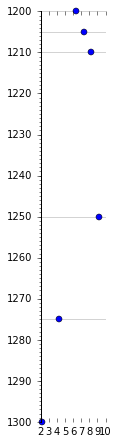

In [16]:
swc_porosity.plot(field='porosity', aspect=4)